### Content-BasedImageRetrievalHW

In this homework, you will learn how to implement a very simple content based imagesearch system and evaluate its performance.

Dataset: U. Kentucky Benchmark Image DatabaseReference: D. Nistér and H. Stewénius. Scalable recognition with a vocabulary tree. In IEEEConference on Computer Vision and Pattern Recognition (CVPR), volume 2, pages 2161-2168,June 2006.

The original database includes 2,550 objects with 4 images for each object (total of10,200 images). The images were taken to simulate variations of lighting, view, occlusion, scale,etc. The images are numbered sequentially, i.e., images of every 4 consecutive numbers belongto the same object (e.g., 00000-00003, or 00100-00103). Note some objects may belong to thesame category (e.g., books, CD covers, etc), but only images of the same object will beconsidered correct matches in this homework. To make the computation more manageable asubset of 2,000 has been extracted. 

The subset can be downloaded at the URL:http://www.ee.columbia.edu/~rj2349/index_files/Homework1/​)

Problems:

1. Write a program to extract the color histogram of each of the 2,000 images. Choose theparameters required with justifications. Implement your own histogram code and compare itsresults with open-source API like OpenCV and numpy.Required submission: source code with comments


2. Write a program to measure the L​2 ​distance between color histograms of two images.Required submission: source code with comments.


3. Use 5 images shown above (ukbench00004.jpg; ukbench00040.jpg; ukbench00060.jpg;ukbench00588.jpg; ukbench01562.jpg) as queries. For each query image, find 10 best matchesfrom the 2,000 images based on the color histogram similarity.Plot the query image and the 10 returned matches (use icons of reduced resolution to savespace).Required submission: source code with comments, plots of matched images for each query.


4. Write a program to measure and plot the P-R curve for each query.Required submission: source code with comments, plots of P-R curves.


5. Discuss and explain success and failure cases.Required submission: written report (at least 1 paragraph)


6. (Optional) try to improve the results by using a different feature or distance metrics (bag ofwords, 3d-color histograms etc) of your choice. Justify your choice with qualitative reasons andback it up with performance comparison results.Required submission: source code with comments, plots or results and P-R curves, writtenreport .

### Problem 1

Write a program to extract the color histogram of each of the 2,000 images. 

Choose the parameters required with justifications. 

Implement your own histogram code and compare itsresults with open-source API like OpenCV and numpy.

Required submission: source code with comments

**Solution:**

As for parameters I will use the following set of variables:

- **color**: binary. default is False. That parameter define either we will treat image as grayscaled and in rgb with 3 layers of color and calculate histogram for each layer.

- **size**: integer. default is 256. This represents number of bins to use in histogram. The histogram itself shows the number of pixels for every pixel value, ie from 0 to 255. So we need 256 values represent every posible pixel value on histogram. However, sometimes we need to find histogram not for all pixels but for the some range of pixels. Then this parameter will be in use.

In [105]:
import cv2 as cv
import numpy as np
import math
import time
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from pylab import rcParams

rcParams['figure.figsize'] = 10, 10

#### Implementation of function to extract the color histogram from picture.

In [79]:
def next_divisor(n, starting_point=1):
    """
    Helper function to define next devider of number 
    """
    for i in range(starting_point, n+1):
        if n % i == 0:
            return int(i)

def img_hist(img_path, color = False, size = 256):
    """
    img_path: string. Path to the image.
    
    color: binary. default is False. That parameter define 
    either we will treat image as grayscaled and in rgb with 
    3 layers of color and calculate histogram for each layer.

    size: integer. default is 256. This represents number 
    of bins to use in histogram. The histogram itself shows 
    the number of pixels for every pixel value, ie from 0 to 255. 
    So we need 256 values represent every posible pixel value on 
    histogram. However, sometimes we need to find histogram not for 
    all pixels but for the some range of pixels. 
    As for simplification that parameter should be divider of 256.
    
    return: list or list of lists
    """
    # reading image
    if color:
        img = cv.cvtColor(cv.imread(path), cv.COLOR_BGR2RGB)
    else:
        img = cv.cvtColor(cv.imread(path), cv.COLOR_BGR2GRAY)
    
    # setup the template for histogram
    if size>256:
        print('Size is bigger than possible max number (256). Setting size to 256.')
        size = 256
    elif size < 3:
        print('Size is smaller than 3. There if no sense of such operation. Setting to 3, which is minimum.')
    elif 256%size!=0:
        print('Size should be divider of 256 to get normal bins. Getting next bigger devisor...')
        size = next_divisor(256, starting_point=size)
        print(f'Size is set to be {size}')
    
    if not color:
        # making histogram
        template = np.zeros(int(size))
        size_of_cell = 256/size
        for line in img:
            for el in line:
                template[int(el/size_of_cell)]+=1
        return template
    if color:
        # getting histogram for each color layer:
        templates = []
        for i in range(3):
            tmp_img = img[:,:,i]
            template = np.zeros(int(size))
            size_of_cell = 256/size
            for line in tmp_img:
                for el in line:
                    template[int(el/size_of_cell)]+=1
            templates.append(template)
        templates = np.array(templates)
        return templates
    


#### Comparing results with OpenCV and Numpy implementations

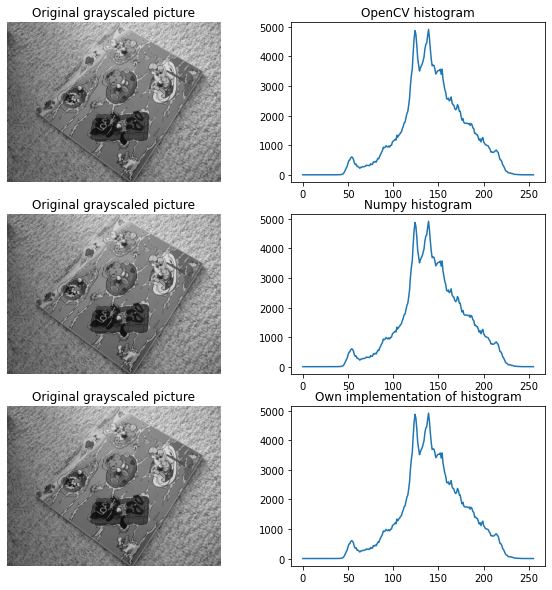

In [96]:
path = 'data/Homework1/ukbench00000.jpg'

img = cv.imread(path)
img = cv.cvtColor(cv.imread(path), cv.COLOR_BGR2GRAY)

SIZE = 256

# OpenCV histogram
hist_cv = cv.calcHist([img],[0],None,[SIZE], [0,256])

# Numpy histogram
hist_np, _ = np.histogram(img.ravel(),SIZE,[0,256])

# Own implementation
hist_own = img_hist(path, color=False, size=SIZE)

# Plotting results
plt.subplot(321)
plt.axis("off")
plt.title('Original grayscaled picture')
plt.imshow(img, 'gray')

plt.subplot(322)
plt.title('OpenCV histogram')
plt.plot(hist_cv)

plt.subplot(323)
plt.axis("off")
plt.title('Original grayscaled picture')
plt.imshow(img, 'gray')

plt.subplot(324)
plt.title('Numpy histogram')
plt.plot(hist_np)

plt.subplot(325)
plt.axis("off")
plt.title('Original grayscaled picture')
plt.imshow(img, 'gray')

plt.subplot(326)
plt.title('Own implementation of histogram')
plt.plot(hist_own)

**Comments:** As we see, for grayscaled pictures histograms in different implementations including mine are the same. 

Lets check the same for color histograms and for smaller size 16:

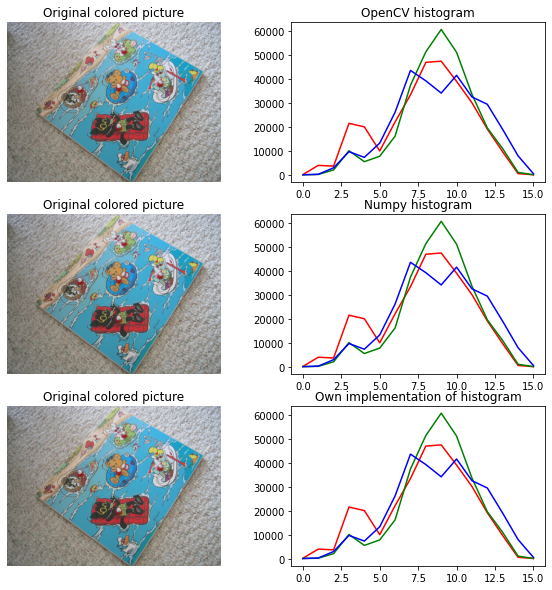

In [103]:
path = 'data/Homework1/ukbench00000.jpg'

img = cv.imread(path)
img = cv.cvtColor(cv.imread(path), cv.COLOR_BGR2RGB)

SIZE = 16

# Own implementation
hist_own = img_hist(path, color=True, size=SIZE)

# Plotting results
plt.subplot(321)
plt.axis("off")
plt.title('Original colored picture')
plt.imshow(img, 'gray')

plt.subplot(322)
plt.title('OpenCV histogram')

start = time.time()
for i, c in enumerate(['r', 'g', 'b']):
    h = cv.calcHist([img],[i],None,[SIZE], [0,256])
    plt.plot(h, color = c)
t = time.time() - start

plt.subplot(323)
plt.axis("off")
plt.title('Original colored picture')
plt.imshow(img, 'gray')

plt.subplot(324)
plt.title('Numpy histogram')
for i, c in enumerate(['r', 'g', 'b']):
    h, _ = np.histogram(img[:,:,i].ravel(),SIZE,[0,256])
    plt.plot(h, color = c)

plt.subplot(325)
plt.axis("off")
plt.title('Original colored picture')
plt.imshow(img, 'gray')

plt.subplot(326)
plt.title('Own implementation of histogram')
for h, c in zip(hist_own, ['r', 'g', 'b']):
    plt.plot(h, color = c)

**Comments:** As we see, for color histograms of size 16 the results are also the same for all 3 implementations. 

Let's also compare time of execution:


In [110]:
SIZE = 256

start = time.time()
img = cv.imread(path)
img = cv.cvtColor(cv.imread(path), cv.COLOR_BGR2RGB)
for i, c in enumerate(['r', 'g', 'b']):
    h = cv.calcHist([img],[i],None,[SIZE], [0,256])
t = time.time() - start
print(f'Time of OpenCV is {t} seconds')

start = time.time()
img = cv.imread(path)
img = cv.cvtColor(cv.imread(path), cv.COLOR_BGR2RGB)
for i, c in enumerate(['r', 'g', 'b']):
    h, _ = np.histogram(img[:,:,i].ravel(),SIZE,[0,256])
t = time.time() - start
print(f'Time of Numpy is {t} seconds')

start = time.time()
hist_own = img_hist(path, color=True, size=SIZE)
t = time.time() - start
print(f'Time of Own implementation is {t} seconds')

Time of OpenCV is 0.016640186309814453 seconds
Time of Numpy is 0.025941848754882812 seconds
Time of Own implementation is 2.5184309482574463 seconds


**Comments:** As we see the real difference is in time of execution. OpenCV implementation is the most optimized and working 2 time faster then numpy. My own implementation is dramaticaly slower then others.

#### Now lets extract color histograms for each picture for further analysis:
I will use OpenCV on that step to make it faster. However the results still remain the same. 

Also there is commented code snippet of how to do the same with own function.

In [158]:
import glob
from tqdm.auto import tqdm

# getting all images pathes
img_pathes = glob.glob("data/Homework1/*")
images_by_index = {i:path for i,path in enumerate(img_pathes)}
inv_images_by_index = {v: k for k, v in images_by_index.items()}

# calculating hists fast way using openCV
hists = [cv.calcHist([cv.cvtColor(cv.imread(path), cv.COLOR_BGR2GRAY)],[0],None,[SIZE], [0,256]) for path in tqdm(img_pathes)]

# # calculating hists slow way using own implementation
# hists = [img_hist(path, color=False, size=SIZE) for path in tqdm(img_pathes)]

hists = np.array(hists)
    

### Problem 2. 

Write a program to measure the L​2 ​distance between color histograms of two images.

Required submission: source code with comments.

L2 distance is:
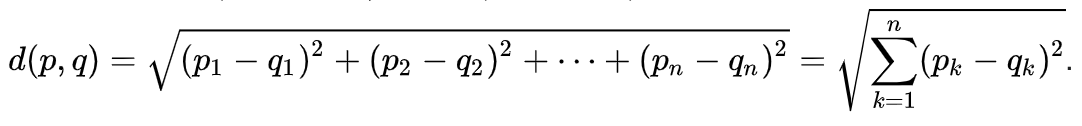

Demonstration of results: 


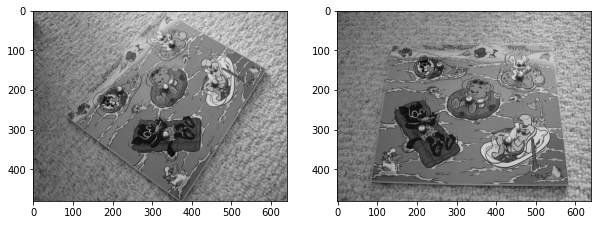

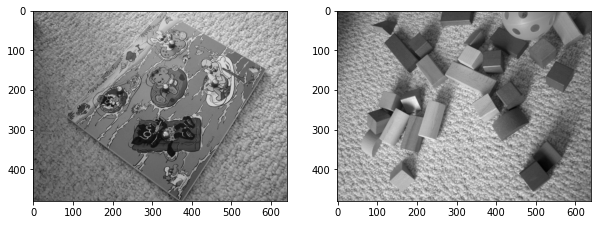

In [175]:
from IPython.core.display import HTML

def min_max_scale(a):
    min_ = a.min()
    max_ = a.max()
    return (a - min_)/(max_ - min_)
     
def l2(a,b):
    dist = (a - b)**2
    dist = np.sum(dist)
    dist = np.sqrt(dist)
    return dist

print('Demonstration of results: ')


display(HTML(f'<h3> Example with similar images</h3>'))
# Plotting results
plt.subplot(121)
plt.imshow(cv.cvtColor(cv.imread('data/Homework1/ukbench00000.jpg'), cv.COLOR_BGR2GRAY), 'gray')

plt.subplot(122)
plt.imshow(cv.cvtColor(cv.imread('data/Homework1/ukbench00001.jpg'), cv.COLOR_BGR2GRAY), 'gray')
plt.show()

d = l2(
    hists[inv_images_by_index['data/Homework1/ukbench00000.jpg']],
    hists[inv_images_by_index['data/Homework1/ukbench00001.jpg']]
)

d = str(round(d,2))

display(HTML(f'<h5> L2 distance between images is {d} </h5>'))

display(HTML(f'<h3> Example with different images</h3>'))

# Plotting results
plt.subplot(121)
plt.imshow(cv.cvtColor(cv.imread('data/Homework1/ukbench00000.jpg'), cv.COLOR_BGR2GRAY), 'gray')

plt.subplot(122)
plt.imshow(cv.cvtColor(cv.imread('data/Homework1/ukbench00011.jpg'), cv.COLOR_BGR2GRAY), 'gray')
plt.show()

d = l2(
    hists[inv_images_by_index['data/Homework1/ukbench00000.jpg']],
    hists[inv_images_by_index['data/Homework1/ukbench00011.jpg']]
)

d = str(round(d,2))

display(HTML(f'<h5> L2 distance between images is {d} </h5>'))

#### Problem 3
Use 5 images shown above (ukbench00004.jpg; ukbench00040.jpg; ukbench00060.jpg;ukbench00588.jpg; ukbench01562.jpg) as queries. For each query image, find 10 best matchesfrom the 2,000 images based on the color histogram similarity.Plot the query image and the 10 returned matches (use icons of reduced resolution to savespace).Required submission: source code with comments, plots of matched images for each query.

In [226]:
query_images = ['data/Homework1/ukbench00004.jpg', 
               'data/Homework1/ukbench00040.jpg',
               'data/Homework1/ukbench00060.jpg',
               'data/Homework1/ukbench00588.jpg',
               'data/Homework1/ukbench01562.jpg']

# modification of l2 function for getting distance to all histograms in one shot. 
def l2_matrix(a,b):
    dist = (a - b)**2
    dist = np.sum(dist, axis = 1)
    dist = np.sqrt(dist)
    return dist[:,0]

# function to get indexes of top N smallest in array.
def smallestN_indices_argparitition(a, N):
    idx = np.argpartition(a.ravel(),N)[:N]
    idx = idx[a.ravel()[idx].argsort()]
    return np.stack(np.unravel_index(idx, a.shape)).T[:,0]

def get_top_similar_images(path_img, k = 10):
    # getting hist of query image
    hist_query = hists[inv_images_by_index[path_img]]
    # getting distance to all other histograms
    dists = l2_matrix(hist_query,hists)
    # getting indexes of elements with smallest distance 
    idx_smallest = smallestN_indices_argparitition(dists, k+1)
    # getting pathes of that images for plotting
    res = [images_by_index[i] for i in idx_smallest[1:]] # exclude the query image (distance to itself is 0)
    return res, dists[idx_smallest[1:]]
    

In [227]:
def plot_results(query, results, dists):
    """
    plotting results taking into account that it should be 10 results.
    
    """
    plt.subplot(3,5,1)
    plt.title('Query image')
    plt.imshow(cv.cvtColor(cv.imread(query), cv.COLOR_BGR2RGB), 'gray')
    
    for i in range(10):
        plt.subplot(3,5,6+i)
        plt.title(f'Top {i+1}, d = {round(dists[i])}')
        plt.imshow(cv.cvtColor(cv.imread(results[i]), cv.COLOR_BGR2RGB), 'gray')
    plt.plot()

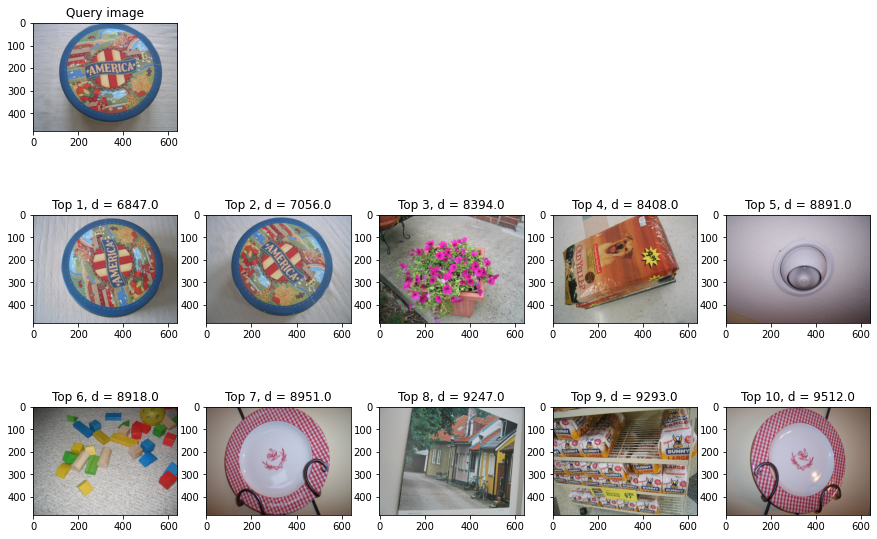

In [235]:
rcParams['figure.figsize'] = 15, 10

i = 0
display(HTML(f'<h3>Results for picture {i+1} </h3>'))

results, dists = get_top_similar_images(query_images[i], k = 10)
plot_results(query_images[i], results, dists)

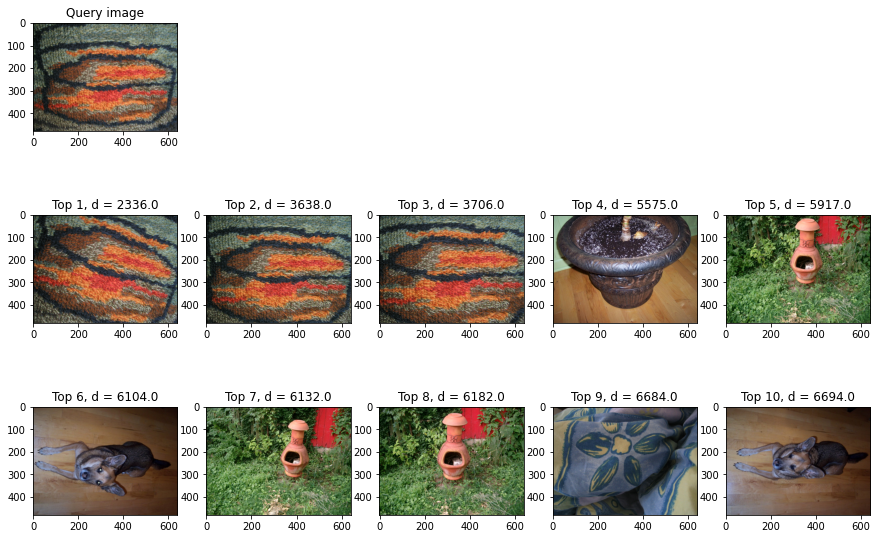

In [236]:
rcParams['figure.figsize'] = 15, 10

i = 1
display(HTML(f'<h3>Results for picture {i+1} </h3>'))

results, dists = get_top_similar_images(query_images[i], k = 10)
plot_results(query_images[i], results, dists)

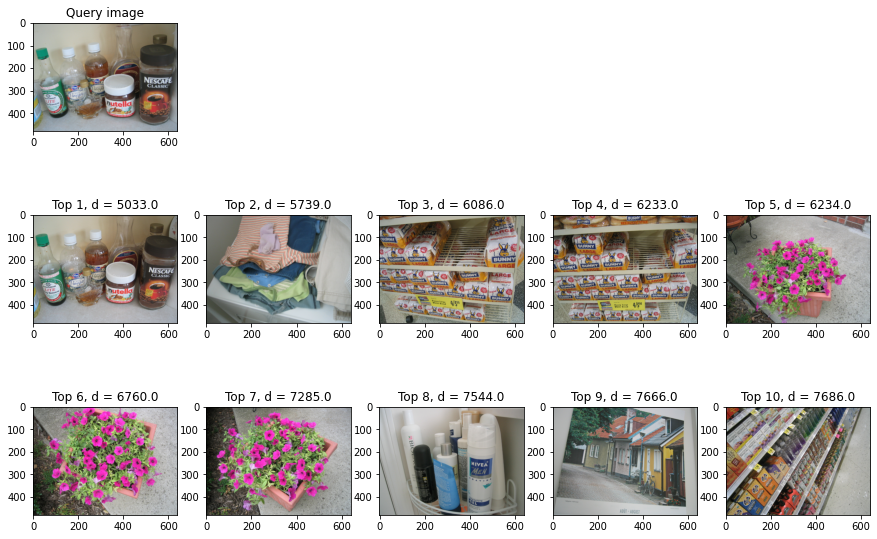

In [237]:
rcParams['figure.figsize'] = 15, 10

i = 2
display(HTML(f'<h3>Results for picture {i+1} </h3>'))

results, dists = get_top_similar_images(query_images[i], k = 10)
plot_results(query_images[i], results, dists)

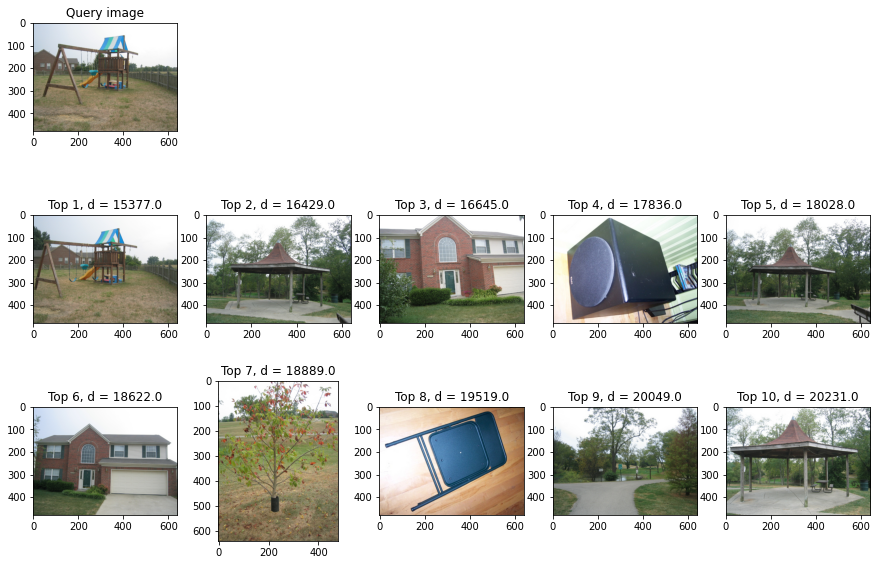

In [238]:
rcParams['figure.figsize'] = 15, 10

i = 3
display(HTML(f'<h3>Results for picture {i+1} </h3>'))

results, dists = get_top_similar_images(query_images[i], k = 10)
plot_results(query_images[i], results, dists)

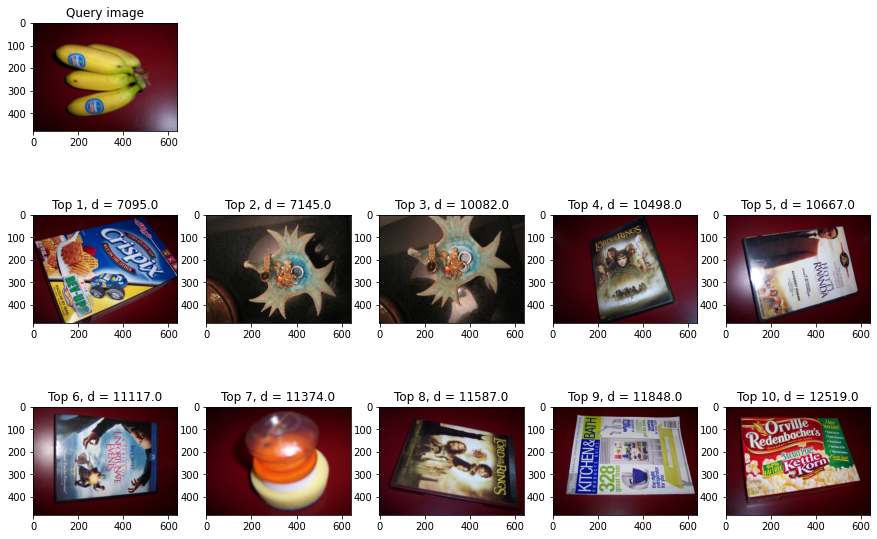

In [239]:
rcParams['figure.figsize'] = 15, 10

i = 4
display(HTML(f'<h3>Results for picture {i+1} </h3>'))

results, dists = get_top_similar_images(query_images[i], k = 10)
plot_results(query_images[i], results, dists)

#### Problem 4.
Write a program to measure and plot the P-R curve for each query.

Required submission: source code with comments, plots of P-R curves.

Actually for that task I need such measurements:

Precision@k = (# of recommended items @k that are relevant) / (# of recommended items @k)

Recall@k = (# of recommended items @k that are relevant) / (total # of relevant items)

In [382]:
# function to get ids from path strings
def get_ids(results):
    ids = []
    for r in results:
        ids.append(int(r[23:27]))
    return ids

# function to get ids of true(similar) images for picture id given
def get_trues(idd):
    tmp = int(idd/4)
    return np.ones(4)*(tmp*4) + [0,1,2,3]

In [408]:
def plot_pr(query, results):
    k = len(results)
    # getting id of query and ids of pictures for the same object:    
    id_true = get_ids([query])[0]
    trues = get_trues(id_true)

    # getting ids of results
    id_pred = get_ids(results)

    # defining if we are predicting correctly
    y_res = [i in trues for i in id_pred]

    # getting precision and recall @k
    y = np.cumsum(y_res)
    p = y/np.arange(1,k+1)
    r = y/3 # as we have only 3 relevant items for each picture query
#     print(p,r)
#     # adding first point
#     p = [1,]+list(p)
#     r = [0,]+list(r)
#     # adding last point
#     p = p+[p[-1]]
#     r = r+[1]
    # plotting results
    plt.plot(r,p, color = 'orange', label = 'p-r plot')
    plt.ylabel('Precision')
    plt.xlabel('Recall')
    plt.title('P-R plot for results')

Result for image 1


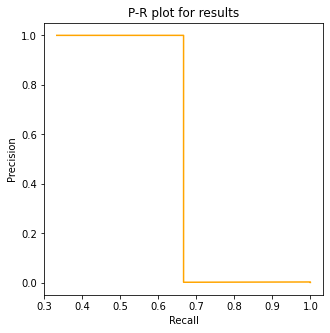

In [409]:
rcParams['figure.figsize'] = 5, 5
i = 0
print(f'Result for image {i+1}')
results, dists = get_top_similar_images(query_images[i], k = 1998)
plot_pr(query_images[i], results)

**Comments:** There are three correct pictures in whole dataset that can match the query. As we see from the plot, we are finding top matches in first pictures and the last one is somewhere in the middle of output if the output is all dataset sorted by distance.

Result for image 2


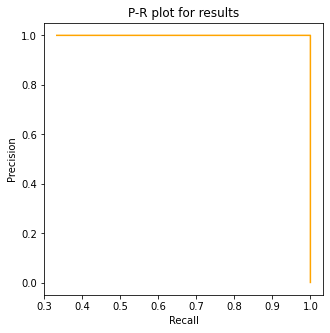

In [402]:
rcParams['figure.figsize'] = 5, 5
i = 1
print(f'Result for image {i+1}')
results, dists = get_top_similar_images(query_images[i], k = 1998)
plot_pr(query_images[i], results)

**Comments:** Here we have perfect results, where all three correct pictures are on the first places.

Result for image 3


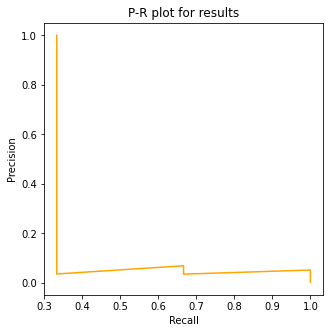

In [403]:
rcParams['figure.figsize'] = 5, 5
i = 2
print(f'Result for image {i+1}')
results, dists = get_top_similar_images(query_images[i], k = 1998)
plot_pr(query_images[i], results)

Here we have totaly different performance for three correct pictures, as correct pictures are on different places in output. Not good performance

Result for image 4


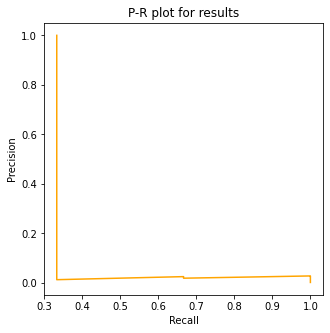

In [404]:
rcParams['figure.figsize'] = 5, 5
i = 3
print(f'Result for image {i+1}')
results, dists = get_top_similar_images(query_images[i], k = 1998)
plot_pr(query_images[i], results)

Here we have totaly different performance for three correct pictures, as correct pictures are on different places in output. Not good performance

Result for image 5


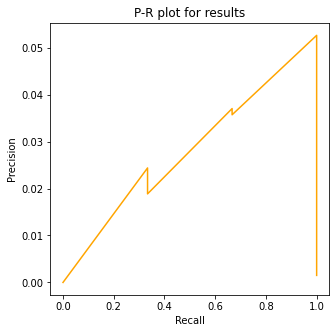

In [405]:
rcParams['figure.figsize'] = 5, 5
i = 4
print(f'Result for image {i+1}')
results, dists = get_top_similar_images(query_images[i], k = 1998)
plot_pr(query_images[i], results)

Here we have expremely poor performance. In previous examples we were getting at least one correct picture in first 10. In that example all correct pictures are not defined as nearest to the query.

## Problem 5. 
Discuss and explain success and failure cases.Required submission: written report (at least 1 paragraph)

First of all we should remember that we are working with colour diagrams. So, while interpretting results, we should take into account how are they working.

1) The biggest failure was the last examle (picture of banana). Correct pictures were not found by defined approach. I interpret that behaviour with the nature of the query picture: a lot of space is filled with specific brown backgroud, at the same time object is small itself, so it consist of not so many pixels and has less influence on color histogram. Also, other correct pictures has objects of different size. As a result in top 10 nearest pictures we observe the examples with the same situation (smal objects on brown background) So my assumption that the algorithm was triggered on background in that case.

2) The best succsses has the picture 2. We found all nearest correct pictures in top 3. As we observe, there is no background on that picture, so we have only object(some carpet) itself. Also, thare are not difference of light condittions of something that. We have only projection difference. As a result, colour histograms does not differ so much, as colours remains the same. So we see that results on diferences in distances to correct and incorrect pictures.

3) Other pictures performs well as to simplisity of algorithm. We found at least one picture in top 10. 



## Problem 6. (Optional) 
try to improve the results by using a different feature or distance metrics (bag of words, 3d-color histograms etc) of your choice. Justify your choice with qualitative reasons andback it up with performance comparison results.Required submission: source code with comments, plots or results and P-R curves, writtenreport .

### First attemp
Let's try cosine distance that seems to be better for large vector spaces.


In [445]:
query_images = ['data/Homework1/ukbench00004.jpg', 
               'data/Homework1/ukbench00040.jpg',
               'data/Homework1/ukbench00060.jpg',
               'data/Homework1/ukbench00588.jpg',
               'data/Homework1/ukbench01562.jpg']

# modification of l2 function for getting distance to all histograms in one shot. 
def l2_matrix(a,b):
    dist = (a - b)**2
    dist = np.sum(dist, axis = 1)
    dist = np.sqrt(dist)
    return dist[:,0]

def cosine_dist(array1, array2):
    sumyy = (array2**2).sum(1)
    sumxx = (array1**2).sum(0)
    sumxy = (array2[:,:,0]).dot(array1)
    return (1 - (sumxy/np.sqrt(sumxx))/np.sqrt(sumyy))[:,0]

# function to get indexes of top N smallest in array.
def smallestN_indices_argparitition(a, N):
    idx = np.argpartition(a.ravel(),N)[:N]
    idx = idx[a.ravel()[idx].argsort()]
    return np.stack(np.unravel_index(idx, a.shape)).T[:,0]

def get_top_similar_images(path_img, k = 10):
    # getting hist of query image
    hist_query = hists[inv_images_by_index[path_img]]
    # getting distance to all other histograms
    dists = cosine_dist(hist_query,hists)
    # getting indexes of elements with smallest distance 
    idx_smallest = smallestN_indices_argparitition(dists, k+1)
    # getting pathes of that images for plotting
    res = [images_by_index[i] for i in idx_smallest[1:]] # exclude the query image (distance to itself is 0)
    return res, dists[idx_smallest[1:]]

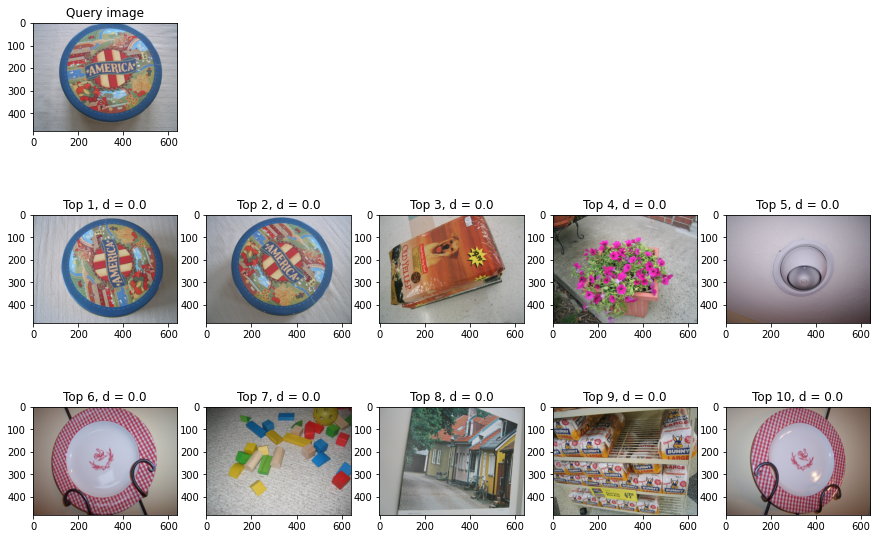

In [446]:
rcParams['figure.figsize'] = 15, 10

i = 0
display(HTML(f'<h3>Results for picture {i+1} </h3>'))

results, dists = get_top_similar_images(query_images[i], k = 10)
plot_results(query_images[i], results, dists)

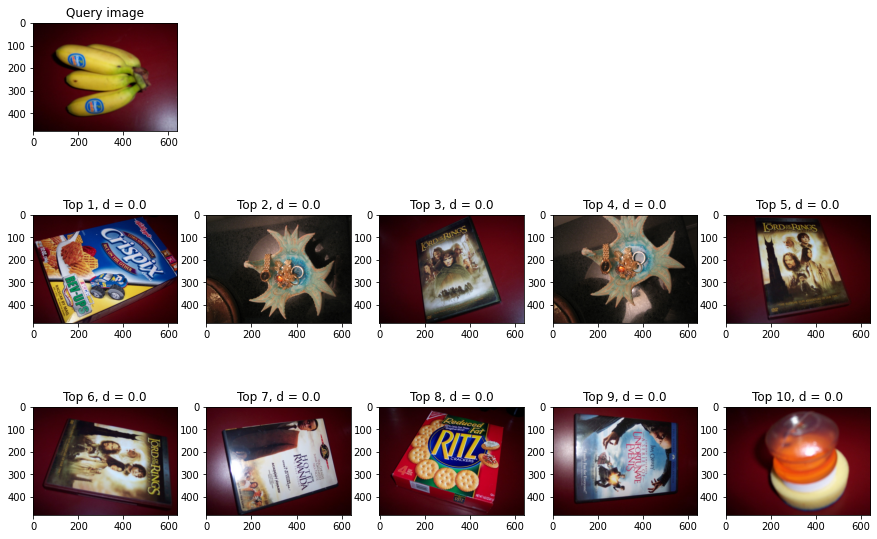

In [447]:
rcParams['figure.figsize'] = 15, 10

i = 4
display(HTML(f'<h3>Results for picture {i+1} </h3>'))

results, dists = get_top_similar_images(query_images[i], k = 10)
plot_results(query_images[i], results, dists)

**Comments** As we see distance metric somehow influence order but it does not solve our problem.


### Second attemp
3 colour histigrams with reduced size for each colour. Also add upper and lower bounds for colour range.

In [478]:
import glob
from tqdm.auto import tqdm

SIZE = 128

# getting all images pathes
img_pathes = glob.glob("data/Homework1/*")
images_by_index = {i:path for i,path in enumerate(img_pathes)}
inv_images_by_index = {v: k for k, v in images_by_index.items()}

# calculating hists fast way using openCV
hists = [list(cv.calcHist([cv.cvtColor(cv.imread(path), cv.COLOR_BGR2RGB)],[0],None,[SIZE], [50,200]))+\
         list(cv.calcHist([cv.cvtColor(cv.imread(path), cv.COLOR_BGR2RGB)],[1],None,[SIZE], [50,200]))+\
         list(cv.calcHist([cv.cvtColor(cv.imread(path), cv.COLOR_BGR2RGB)],[2],None,[SIZE], [50,200])) for path in tqdm(img_pathes)]

# # calculating hists slow way using own implementation
# hists = [img_hist(path, color=False, size=SIZE) for path in tqdm(img_pathes)]

hists = np.array(hists)

In [479]:
hists.shape

(2000, 384, 1)

In [480]:
query_images = ['data/Homework1/ukbench00004.jpg', 
               'data/Homework1/ukbench00040.jpg',
               'data/Homework1/ukbench00060.jpg',
               'data/Homework1/ukbench00588.jpg',
               'data/Homework1/ukbench01562.jpg']

# modification of l2 function for getting distance to all histograms in one shot. 
def l2_matrix(a,b):
    dist = (a - b)**2
    dist = np.sum(dist, axis = 1)
    dist = np.sqrt(dist)
    return dist[:,0]

# function to get indexes of top N smallest in array.
def smallestN_indices_argparitition(a, N):
    idx = np.argpartition(a.ravel(),N)[:N]
    idx = idx[a.ravel()[idx].argsort()]
    return np.stack(np.unravel_index(idx, a.shape)).T[:,0]

def get_top_similar_images(path_img, k = 10):
    # getting hist of query image
    hist_query = hists[inv_images_by_index[path_img]]
    # getting distance to all other histograms
    dists = l2_matrix(hist_query,hists)
    # getting indexes of elements with smallest distance 
    idx_smallest = smallestN_indices_argparitition(dists, k+1)
    # getting pathes of that images for plotting
    res = [images_by_index[i] for i in idx_smallest[1:]] # exclude the query image (distance to itself is 0)
    return res, dists[idx_smallest[1:]]
    
def plot_results(query, results, dists):
    """
    plotting results taking into account that it should be 10 results.
    
    """
    plt.subplot(3,5,1)
    plt.title('Query image')
    plt.imshow(cv.cvtColor(cv.imread(query), cv.COLOR_BGR2RGB), 'gray')
    
    for i in range(10):
        plt.subplot(3,5,6+i)
        plt.title(f'Top {i+1}, d = {round(dists[i])}')
        plt.imshow(cv.cvtColor(cv.imread(results[i]), cv.COLOR_BGR2RGB), 'gray')
    plt.plot()

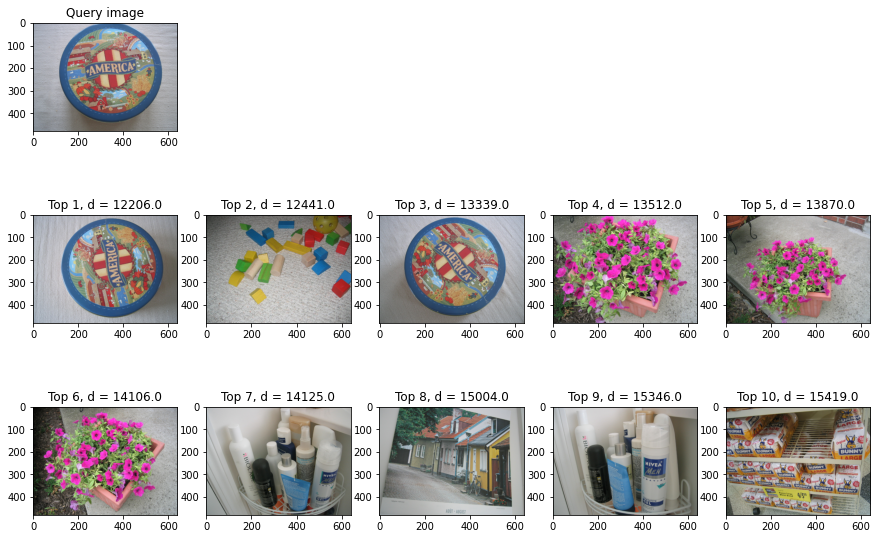

In [503]:
rcParams['figure.figsize'] = 15, 10

i = 0
display(HTML(f'<h3>Results for picture {i+1} </h3>'))

results, dists = get_top_similar_images(query_images[i], k = 10)
plot_results(query_images[i], results, dists)


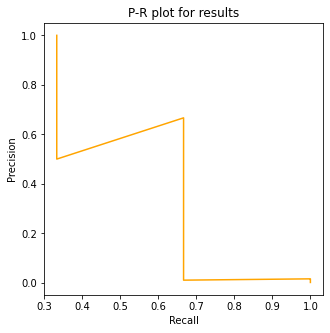

In [504]:
rcParams['figure.figsize'] = 5, 5
results, dists = get_top_similar_images(query_images[i], k = 1998)
plot_pr(query_images[i], results)

#### As from the p-r plot and pictures, performance is almost the  same.

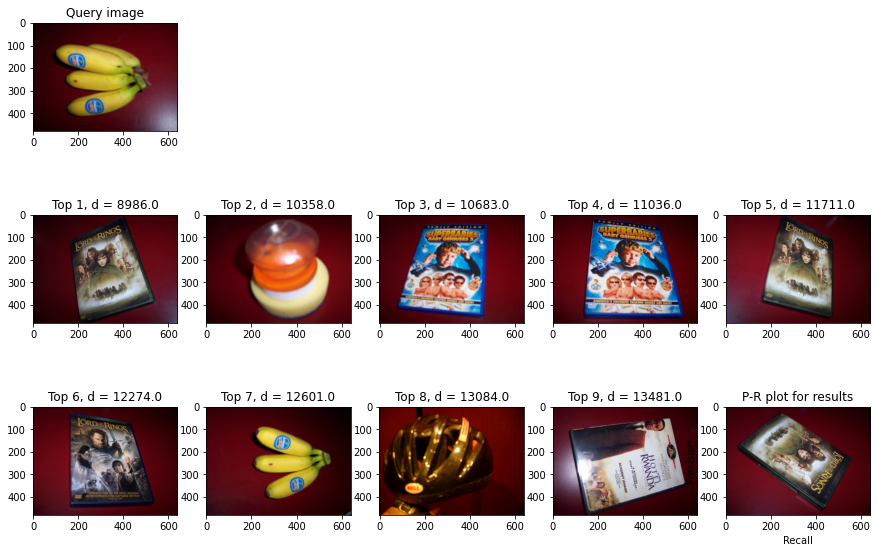

In [505]:
rcParams['figure.figsize'] = 15, 10

i = 4
display(HTML(f'<h3>Results for picture {i+1} </h3>'))

results, dists = get_top_similar_images(query_images[i], k = 10)
plot_results(query_images[i], results, dists)
plot_pr(query_images[i], results)

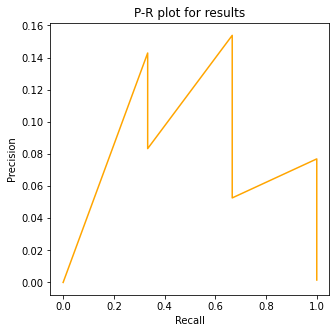

In [506]:
rcParams['figure.figsize'] = 5, 5
results, dists = get_top_similar_images(query_images[i], k = 1998)
plot_pr(query_images[i], results)

We have improvement in that example, as we have correct picture on in top 10 (7th position). Also there is improvement in general as from p-r plot.

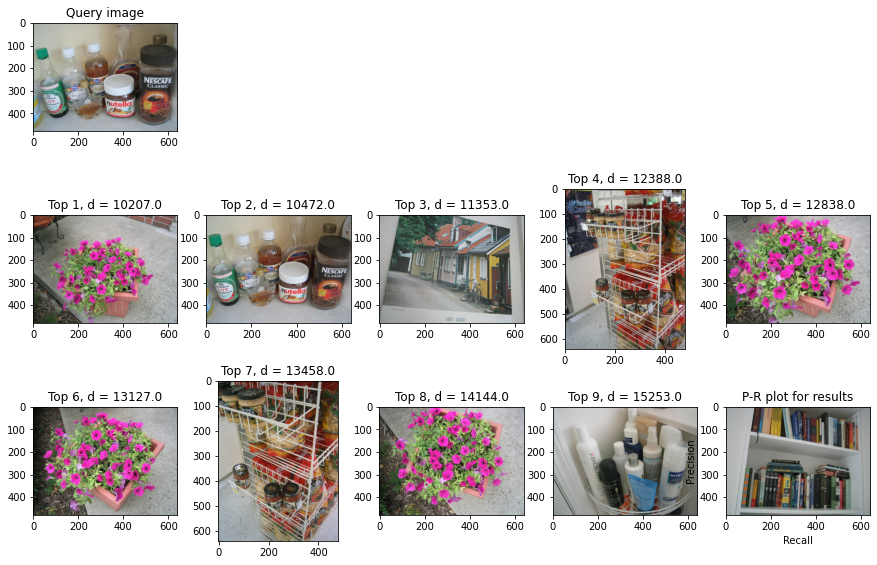

In [507]:
rcParams['figure.figsize'] = 15, 10

i = 2
display(HTML(f'<h3>Results for picture {i+1} </h3>'))

results, dists = get_top_similar_images(query_images[i], k = 10)
plot_results(query_images[i], results, dists)
plot_pr(query_images[i], results)

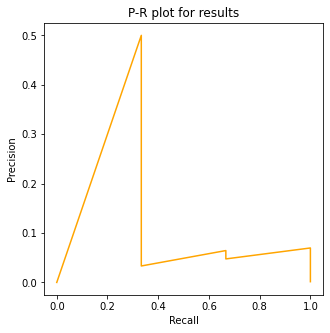

In [508]:
rcParams['figure.figsize'] = 5, 5
results, dists = get_top_similar_images(query_images[i], k = 1998)
plot_pr(query_images[i], results)

We have slightly worse results. We still have only one correct picture in top 10, however no it is on the second place. As from the p-r plot performance is pretty the same.

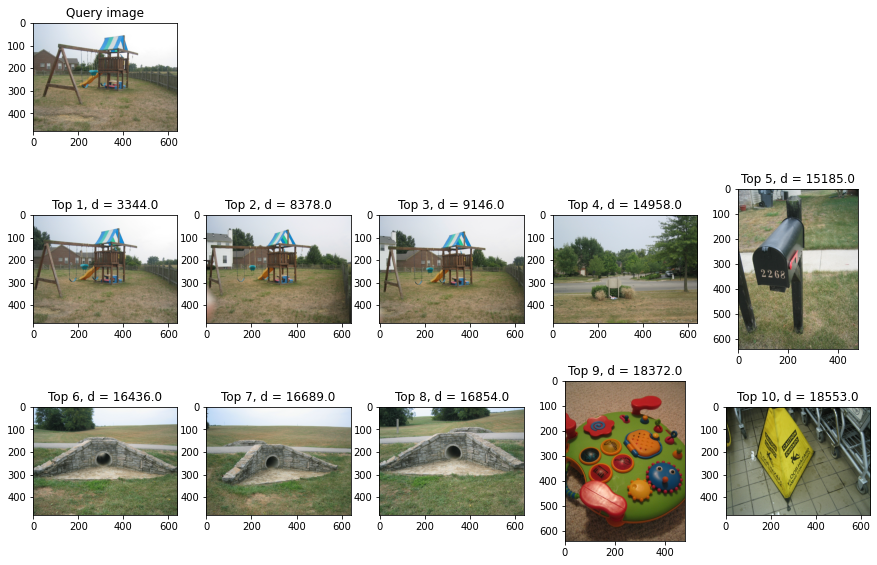

In [498]:
rcParams['figure.figsize'] = 15, 10

i = 3
display(HTML(f'<h3>Results for picture {i+1} </h3>'))

results, dists = get_top_similar_images(query_images[i], k = 10)
plot_results(query_images[i], results, dists)

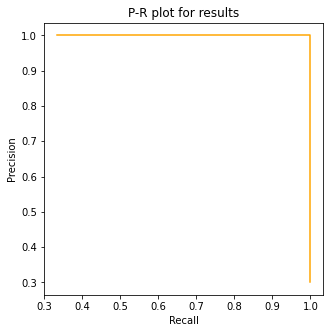

In [499]:
rcParams['figure.figsize'] = 5, 5
plot_pr(query_images[i], results)

We see dramadic improvement in that example. Previosly we had only one picture in top 10 result. Now we have all in top 3

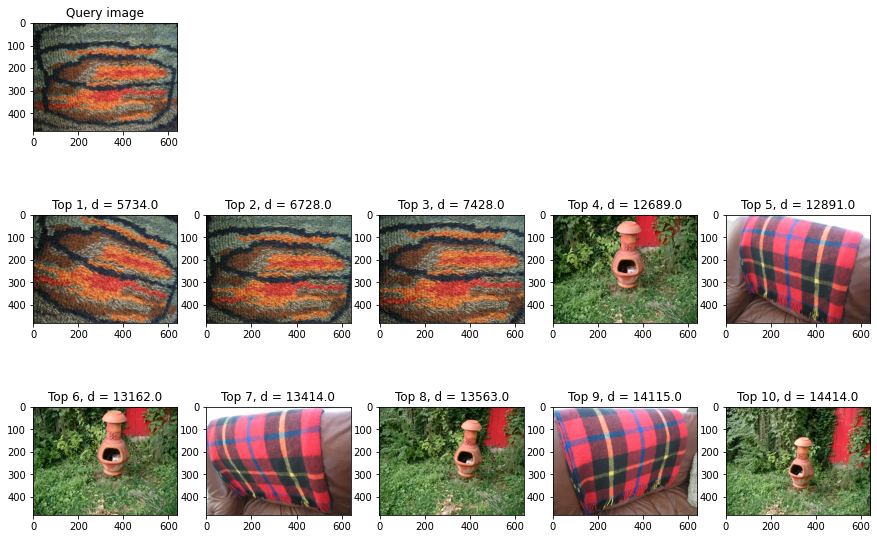

In [500]:
rcParams['figure.figsize'] = 15, 10

i = 1
display(HTML(f'<h3>Results for picture {i+1} </h3>'))

results, dists = get_top_similar_images(query_images[i], k = 10)
plot_results(query_images[i], results, dists)

Still have perfect result here

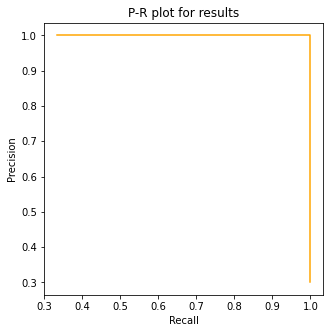

In [501]:
rcParams['figure.figsize'] = 5, 5
plot_pr(query_images[i], results)